In [1]:
import warnings

import os
import tqdm

import numpy as np
import pandas as pd
import scipy.optimize
import scipy.stats as st

import holoviews as hv
hv.extension('matplotlib')
import colorcet as cc

import lateral_signaling as lsig

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

<hr>

In [22]:
data_file = "C://Users/Pranav/git/evomorph/data/growth_curves.csv"

save_dir  = "C://Users/Pranav/git/evomorph/data"

save_data = False

In [20]:
assert os.path.exists(data_file), "File does not exist"

df = pd.read_csv(data_file)

df["initial cell density (mm^-2)"] = df["initial cell density (mm^-2)"].values.astype(int)
df["density (mm^-2)"] = df.cell_count / 320

df.head().append(df.tail())

days_integer  condition  initial cell density (mm^-2) replicate  \
0               0  untreated                          1250         a   
1               0  untreated                          1250         b   
2               0  untreated                          1250         c   
3               1  untreated                          1250         a   
4               1  untreated                          1250         b   
202             6       FGF2                          5000         a   
203             6       FGF2                          5000         b   
204             6       FGF2                          5000         c   
205             7       FGF2                          5000         a   
206             7       FGF2                          5000         b   

                   date_time time_of_sample  time (days)  cell_count  \
0                        NaN            NaN     0.000000      400000   
1                        NaN            NaN     0.000000      400000   
2                        NaN            NaN     0.000000      400000   
3     06.27.2020 06:29:47 AM    06:29:47 AM     1.000000      322564   
4     06.27.2020 06:46:26 AM    06:46:26 AM     1.011562      328429   
202   07.02.2020 05:32:01 AM    05:32:01 AM     5.949549     2345918   
203   07.02.2020 05:39:56 AM    05:39:56 AM     5.955046     2222758   
204   07.02.2020 05:47:44 AM    05:47:44 AM     5.960463     2216893   
205   07.03.2020 05:14:06 AM    05:14:06 AM     6.937106     1677332   
206   07.03.2020 05:21:56 AM    05:21:56 AM     6.942546     1841546   

     density (mm^-2)  
0        1250.000000  
1        1250.000000  
2        1250.000000  
3        1008.012500  
4        1026.340625  
202      7330.993750  
203      6946.118750  
204      6927.790625  
205      5241.662500  
206      5754.831250

In [3]:
# Select growth data starting from 100% confluence 
rho_0 = 1250   # cells / mm^2
data = df.loc[df["initial cell density (mm^-2)"] == rho_0]

In [11]:
# Unpack conditions and density data
conds = []
rhos = np.zeros((3, 23))

for i, tup in enumerate(data.groupby(["condition"])):
    
    # Get condition
    conds.append(tup[0])
    
    # Get density data in chronological order
    d = tup[1].sort_values("time (days)")
    rhos[i] = d["density (mm^-2)"].values

:NdOverlay   [condition]
   :Scatter   [days_integer]   (density (mm^-2),condition)
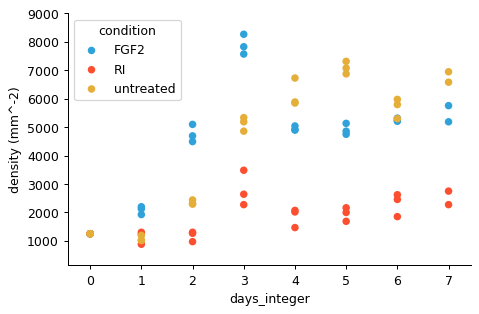

In [12]:
p1 = hv.Scatter(
    data=data,
    kdims=["days_integer"],
    vdims=["density (mm^-2)", "condition"],
).groupby(
    "condition"
).overlay(
    "condition"
).opts(
    aspect=1.6,
    fig_size=160,
)

hv.output(p1, dpi=90)

In [13]:
# Get time-points 
tmax_days = df.days_integer.max()
t = np.repeat(np.arange(tmax_days + 1), 3)[:-1]

In [14]:
def resid(params, t, rho, rho_0):
    """Residual for logistic growth model."""
    g, rho_max = params
    return rho - lsig.logistic(t, g, rho_0, rho_max)

def logistic_mle_lstq(data):
    """Compute MLE for parameters in logistic growth model."""
    t, rho, rho_0 = data
    
    # Get the maximum likelihood estimate (MLE) parameters
    res = scipy.optimize.least_squares(
        resid, np.array([1, 5000]), args=(t, rho, rho_0), bounds=([0, rho_0], [8, 2e5])
    )

    # Compute residual sum of squares from MLE params
    rss_mle = np.sum(resid(res.x, t, rho, rho_0)**2)

    # Compute the root-mean-squared deviation (the MLE for standard deviation)
    sigma_mle = np.sqrt(rss_mle / len(t))

    return tuple([x for x in res.x] + [sigma_mle])

In [15]:
mle_params = np.zeros((3,3))
for i in range(3):
    mle_params[i] = logistic_mle_lstq([t, rhos[i], rho_0])

mle_params

array([[1.46209717e+00, 5.67945094e+03, 1.05525685e+03],
       [3.13327247e-01, 2.73033529e+03, 4.96578882e+02],
       [7.28398184e-01, 7.03800303e+03, 7.87495152e+02]])

In [32]:
mle_params_df = pd.DataFrame(dict(
    condition=conds,
    g_inv_days=mle_params[:, 0],
    rho_max_inv_mm2=mle_params[:, 1],
    sigma=mle_params[:, 2],
    g_ratio=mle_params[:, 0] / mle_params[2, 0],
    rho_max_ratio=mle_params[:, 1]/rho_0,
    doubling_time_days=np.log(2) / mle_params[:, 0],
    doubling_time_hours=24 * np.log(2) / mle_params[:, 0],
))

In [33]:
mle_params_df

condition  g_inv_days  rho_max_inv_mm2        sigma   g_ratio  \
0       FGF2    1.462097      5679.450941  1055.256851  2.007277   
1         RI    0.313327      2730.335293   496.578882  0.430159   
2  untreated    0.728398      7038.003027   787.495152  1.000000   

   rho_max_ratio  doubling_time_days  doubling_time_hours  
0       4.543561            0.474077            11.377857  
1       2.184268            2.212215            53.093156  
2       5.630402            0.951605            22.838514

In [34]:
if save_data:
    
    mle_params_fname = "growth_parameters_MLE.csv"
    save_path = os.path.realpath(os.path.join(save_dir, mle_params_fname))
    mle_params_df.to_csv(save_path)

<hr>

:Overlay
   .NdOverlay.I  :NdOverlay   [condition]
      :Scatter   [days_integer]   (density (mm^-2),condition)
   .NdOverlay.II :NdOverlay   [condition]
      :Curve   [time (days)]   (density (mm^-2),condition)
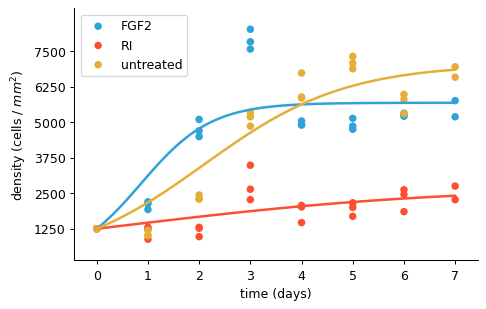

In [28]:
nt_ = 101
t_ = np.linspace(0, 7, nt_)
rho_s = [lsig.logistic(t_, mle_params[i, 0], rho_0, mle_params[i, 1]) for i in range(3)]

theor_curves = {
    "time (days)": np.tile(t_, 3),
    "density (mm^-2)": [*rho_s[0], *rho_s[1], *rho_s[2]],
    "condition": np.repeat(conds, nt_),
}

p2 = hv.Curve(
    data=theor_curves,
    kdims=["time (days)"],
    vdims=["density (mm^-2)", "condition"],
).groupby(
    "condition"
).overlay(
    "condition"
).opts(
    xlabel="time (days)",
    ylabel=r"density (cells / $mm^2$)",
    yticks=(0, 1250, 2500, 3750, 5000, 6250, 7500),
    aspect=1.6,
    fig_size=160,
)

hv.output(p1 * p2, dpi=90)

:Overlay
   .Scatter.I :Scatter   [days_integer]   (density (mm^-2))
   .Curve.I   :Curve   [time (days)]   (density (mm^-2))
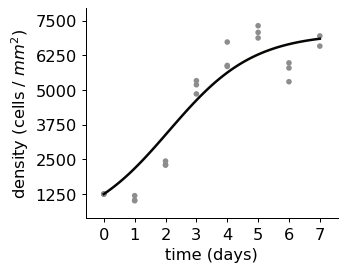

In [37]:
nt_ = 101
t_ = np.linspace(0, 7, nt_)
rho_s = lsig.logistic(t_, mle_params[2, 0], rho_0, mle_params[2, 1])

theor_curves = {
    "time (days)": np.tile(t_, 1),
    "density (mm^-2)": rho_s,
    "condition": np.repeat(conds[2:3], nt_),
}

untreated_points = hv.Scatter(
    data=data.loc[data["condition"] == "untreated"],
    kdims=["days_integer"],
    vdims=["density (mm^-2)"],
).opts(
    fontscale=1.3,
    aspect=1.2,
    c=cc.gray[150],
    marker="o",
    s=20,
#     fig_size=160,
)


untreated_curve = hv.Curve(
    data=theor_curves,
    kdims=["time (days)"],
    vdims=["density (mm^-2)"],
).opts(
    xlabel="time (days)",
    ylabel=r"density (cells / $mm^2$)",
    xticks=np.arange(8),
    yticks=(0, 1250, 2500, 3750, 5000, 6250, 7500),
    fontscale=1.3,
    aspect=1.2,
    c=lsig.col_black,
#     fig_size=160,
)

density_overlay_untreated = untreated_points * untreated_curve

hv.output(density_overlay_untreated, dpi=90)

In [39]:
# Save 
if save_figs:
    plot_fname = f"experiment_dens_curvefit_untreated_7days"
    plot_path = os.path.join(save_dir, plot_fname + "." + fig_fmt)
    hv.save(density_overlay_untreated, plot_path, dpi=dpi, fmt=fig_fmt)

<hr>

In [ ]:
import bebi103

import bokeh.io
bokeh.io.output_notebook()
# bebi103.hv.set_defaults()

In [3]:
# Set RNG seed
rg = np.random.default_rng(2021)

In [20]:
def gen_logistic_data(params, t, rho_0, size, rg):
    """Generate a new logistic growth data set."""
    mu = lsig.logistic(t, params[0], rho_0, params[1])
    sigma = params[-1]
    gen_rho = np.maximum(rg.normal(mu, sigma), 0)

    return [t, gen_rho, rho_0]

In [21]:
all_cond_bs_reps = []
all_cond_conf_int = np.empty((3, 2, 3))

for i in range(3):
    
    # Bootstrap replicates of maximum likelihood estimation
    bs_reps = bebi103.draw_bs_reps_mle(
        logistic_mle_lstq,
        gen_logistic_data,
        data = [t, rhos[i], rho_0],
        mle_args=(),
        gen_args=(t, rho_0),
        size=5000,
        n_jobs=1,
        progress_bar=True,
    )
    all_cond_bs_reps.append(bs_reps)

    # Compute confidence intervals
    conf_ints = np.percentile(bs_reps, [2.5, 97.5], axis=0)
    
    all_cond_conf_int[i] = conf_ints

100%|██████████| 5000/5000 [00:17<00:00, 287.05it/s]


In [22]:
# Package replicates in data frame for plotting
df_res = pd.DataFrame(data=all_cond_bs_reps[0], columns=["g", "ρ_max", "σ"])

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    p1 = bebi103.viz.corner(
        samples=df_res,
        pars=["g", "ρ_max", "σ"],
        show_contours=True,
        levels = [0.95],
    )

bokeh.io.show(p1)

In [23]:
# Package replicates in data frame for plotting
df_res = pd.DataFrame(data=all_cond_bs_reps[1], columns=["g", "ρ_max", "σ"])

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    p2 = bebi103.viz.corner(
        samples=df_res,
        pars=["g", "ρ_max", "σ"],
        show_contours=True,
        levels = [0.95],
    )

bokeh.io.show(p2)

In [24]:
# Package replicates in data frame for plotting
df_res = pd.DataFrame(data=all_cond_bs_reps[2], columns=["g", "ρ_max", "σ"])

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    p3 = bebi103.viz.corner(
        samples=df_res,
        pars=["g", "ρ_max", "σ"],
        show_contours=True,
        levels = [0.95],
    )

bokeh.io.show(p3)

In [1]:
# # Package replicates in data frame for plotting
# df_res = pd.DataFrame(data=all_cond_bs_reps[0], columns=["g", "ρ_max", "σ"])

# with warnings.catch_warnings():
#     warnings.simplefilter("ignore")
#     p1 = bebi103.viz.corner(
#         samples=df_res,
#         pars=["g", "ρ_max", "σ"],
#         show_contours=True,
#         levels = [0.95],
# #         background_fill_color = None,
# #         border_fill_color = None,
#     )

# # bokeh.io.show(p1)
# # p1.background_fill_color = None
# # p1.border_fill_color = None

# bokeh.io.export_png(p1, filename="plots/cornerplot1.png")
# bokeh.io.export_svg(p1, filename="plots/cornerplot1.svg")

<hr>

In [18]:
def log_likelihood(params, t, rho, rho_0):
    """Log likelihood of logistic growth."""
    g, rho_max, sigma = params

    if g <= 0 or rho_max <= 0 or sigma <= 0:
        return -np.inf

    mu = lsig.logistic(t, g, rho_0, rho_max)
    return np.sum(st.norm.logpdf(rho, mu, sigma))

In [19]:
def logistic_mle(t, rho, rho_0):
    """Compute MLE for parameters in logistic growth model."""
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")

        res = scipy.optimize.minimize(
            fun=lambda params, t, rho, rho_0: -log_likelihood(params, t, rho, rho_0),
            x0=np.array([1, 5000, 500]),
            args=(t, rho, rho_0),
            method='Powell'
        )

    if res.success:
        return res.x
    else:
        raise RuntimeError('Convergence failed with message', res.message)

In [21]:
cond_mle_params = []

iterator = range(len(conds))
iterator = tqdm.tqdm(iterator)

for i in iterator:
    rho = rhos[i]
    res = logistic_mle(t, rho, rho_0)
    cond_mle_params.append(res)
    
cond_mle_params = np.array(cond_mle_params)

100%|██████████| 3/3 [00:00<00:00,  4.87it/s]


In [22]:
cond_mle_params

array([[1.46364517e+00, 5.67885493e+03, 1.05525815e+03],
       [1.61942562e-01, 5.01051259e+03, 5.02591944e+02],
       [7.30798944e-01, 7.03432523e+03, 7.84915716e+02]])